# Лабораторная работа №2

ФИО: Поляховская Ольга Александровна
Группа: БИВТ-22-СП-2
Датасет: winequality-red.csv

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. ~~**Найти** в таблице (из исходных данных) название своего датасета~~
2. ~~**Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])~~
3. ~~Построить распределение целевой переменной в виде гистограммы
сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.~~
4. ~~Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).~~
5. ~~Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).~~
6.~~ Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. ~~
7. ~~Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.~~
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0.Постановка задачи
Дан датасет оценки качества красных вин. 
Параметры вин:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

Целевой параметр - quality. Данный параметр является дискретным, обозначает качество вина и выражается оценкой от 0 до 10.

Необходимо:
1. Построить распределение по качеству вина в виде гистограммы
2. Вывести основные статистики по переменным в датасете
3. Вывести основную информацию по датасету
4. Посчитать количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположить, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
5. Построить гистограммы 5 любых признаков.
6. Построить графики зависимости 5 любых переменных от целевой переменной. Сделать вывод, можно ли использовать эти переменные для прогнозирования целевой переменной.

### Импорт данных

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

data = pd.read_csv('winequality-red.csv', sep=',')
data 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Разделение целевой переменной от остальных признаков

In [2]:
x = data.drop('quality', axis=1)
y=data['quality']

### Задание 1.
Построение распределения качества вина в виде гистограммы

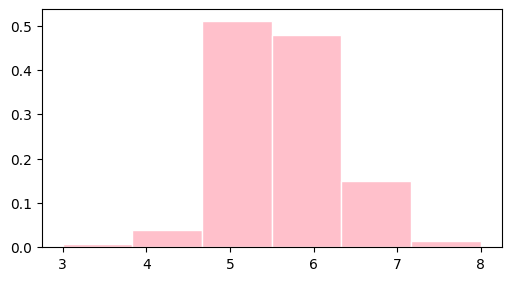

In [3]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(y, 6, density=True, color='pink', edgecolor='white')
plt.show()

*По гистограмме видно, что оценки распределены нормально*

Подсчет количества оценок качества вина

In [4]:
counts = Counter(y)
quantity_table ={
	'Quality': counts.keys(),
	'Quantity': counts.values()
}
frequency = pd.DataFrame(quantity_table).sort_values(by='Quality')
print(f'Количество уникальных значений качества вина: {len(frequency)}')
frequency

Количество уникальных значений качества вина: 6


,Quality,Quantity
5,3,10
3,4,53
0,5,681
1,6,638
2,7,199
4,8,18


### Задание 2.
Основные статистики по переменным в датасете

In [5]:
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Задание 3.
Вывод основной информации о датасете

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Задание 4.
Подсчет количества пропусков элементов во всех колонках

In [7]:
missing_count = pd.isna(data).sum()
print(missing_count)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Задание 5.
Построить гистограммы 5 любых признаков

1) Распределения содержания алкоголя в винах

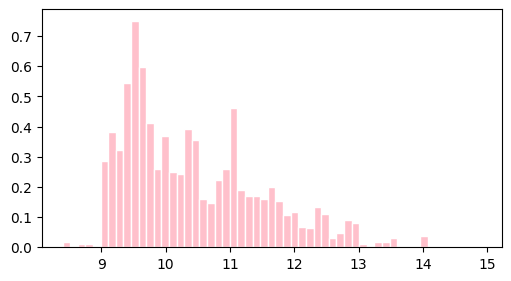

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(data.loc[:, 'alcohol'], 55, density=True, color='pink', edgecolor='white')
plt.show()

2) Распределение 

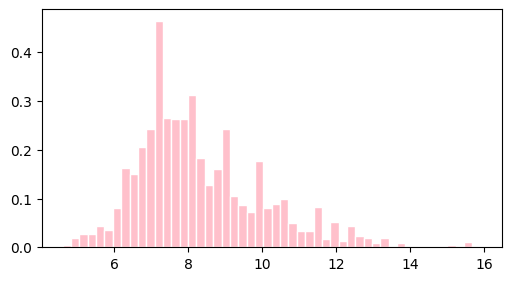

In [9]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(x.loc[:, 'fixed acidity'], 50, density=True, color='pink', edgecolor='white')
plt.show()

3) Распределение значения pH

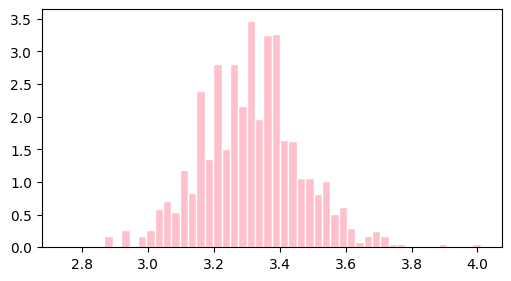

In [10]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(x.loc[:,'pH'], 50, density=True, color='pink', edgecolor='white')
plt.show()

4) Распределение сахара в красных винах

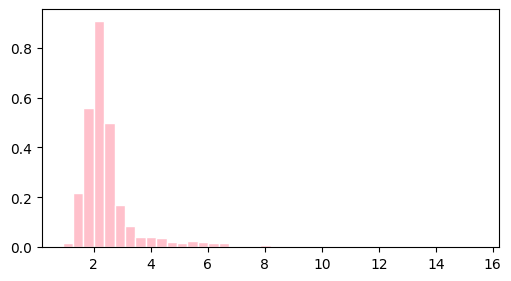

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(x.loc[:,'residual sugar'], 40, density=True, color='pink', edgecolor='white')
plt.show()

5) Распределение

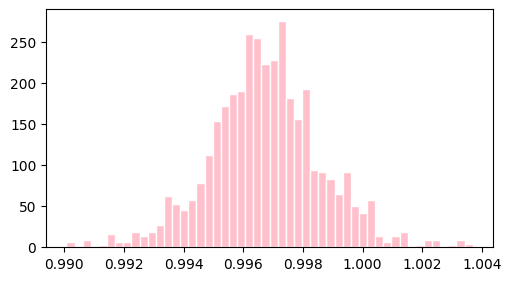

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(x.loc[:,'density'], 50, density=True, color='pink', edgecolor='white')
plt.show()

### Задание 6.
Построить графики зависимости 5-ти любых параметров от целевого параметра(качества вина)

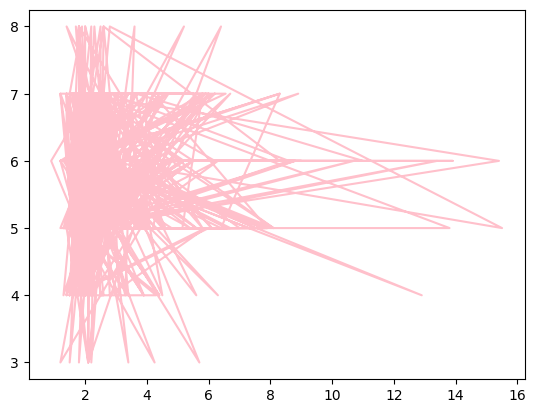

In [13]:
# unite parametr and Y, find mean and make it as point
#Target: find mean residual sugar+quality
plt.plot(x.loc[:,'residual sugar'], y, color='pink')
